# Simulación de Vibraciones en Sistemas de un Grado de Libertad


## Introducción
Este notebook presenta una simulación de la respuesta dinámica de un sistema de un grado de libertad (1GDL) utilizando Python. Este tipo de sistema es una idealización común para estructuras simples y es fundamental en el estudio de la dinámica estructural.


## Fundamentos Teóricos
La ecuación diferencial que describe la dinámica de un sistema 1GDL es:

$ m \ddot{u}(t) + c \dot{u}(t) + k u(t) = F(t) $

donde:
- \( m \) es la masa,
- \( c \) es el coeficiente de amortiguamiento,
- \( k \) es la rigidez,
- \( u(t) \) es el desplazamiento,
- \( F(t) \) es la fuerza externa.

Para la vibración libre (sin fuerza externa), la ecuación se simplifica a:

$ m \ddot{u}(t) + c \dot{u}(t) + k u(t) = 0 $



## Parámetros del Sistema
Definimos los parámetros del sistema como sigue:

- Masa (\( m \)): 1.0 kg
- Rigidez (\( k \)): 100.0 N/m
- Coeficiente de amortiguamiento (\( c \)): 2.0 Ns/m
- Frecuencia natural $ \omega_n $:

$ \omega_n = \sqrt{\frac{k}{m}} = \sqrt{100.0} = 10.0 \text{ rad/s} $

# Importación de Bibliotecas Necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Definición de Parámetros y Funciones

In [3]:
# Parámetros del sistema
m = 1.0  # masa (kg)
k = 100.0  # rigidez (N/m)
c = 2.0  # coeficiente de amortiguamiento (N·s/m)
omega_n = np.sqrt(k / m)  # frecuencia natural (rad/s)

# Fuerza externa
def F(t):
    return 10 * np.sin(2 * omega_n * t)

# Ecuaciones de movimiento
def equations(t, y):
    u, v = y
    du_dt = v
    dv_dt = (F(t) - c * v - k * u) / m
    return [du_dt, dv_dt]

# Condiciones iniciales
u0 = [0.1, 0.0]


# Solución Numérica

In [4]:
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

solution = solve_ivp(equations, t_span, u0, t_eval=t_eval)

t = solution.t
u = solution.y[0]
v = solution.y[1]


# Visualización de Resultados

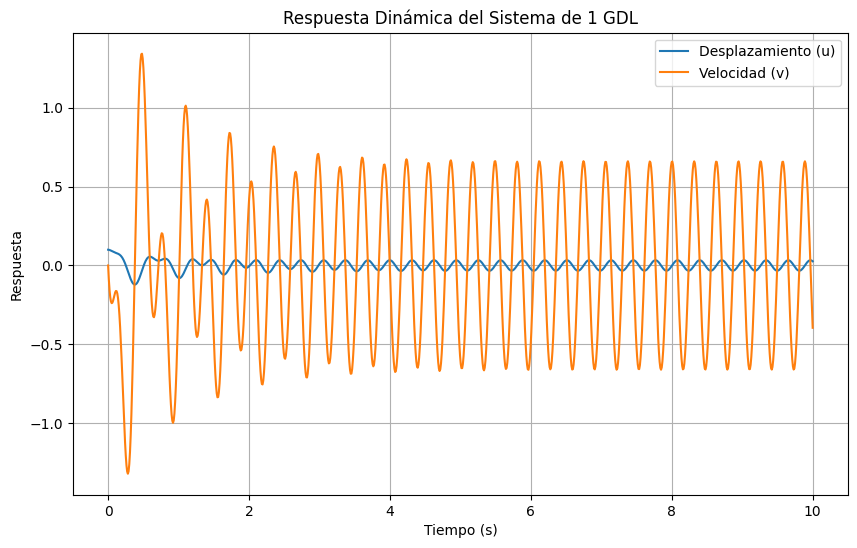

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t, u, label='Desplazamiento (u)')
plt.plot(t, v, label='Velocidad (v)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.title('Respuesta Dinámica del Sistema de 1 GDL')
plt.legend()
plt.grid(True)
plt.show()


# Conclusiones


La simulación de un sistema de un grado de libertad utilizando Python permite analizar y visualizar la respuesta dinámica bajo diferentes condiciones de excitación. Esta herramienta es útil para ingenieros y estudiantes que buscan entender mejor la dinámica estructural.